<a href="https://colab.research.google.com/github/rjakkani1015/rashmi_INFO5731_-Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [56]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#2
URL=["https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3"]
content=[]
rating=[]
reviewTitle=[]
titles=[]
for i in URL:
  page=requests.get(i,headers={'User-Agent':'Chrome/85.0.4183.121'})
  soup = BeautifulSoup(page.content, 'html.parser')
  val=soup.find_all('div', class_='text show-more__control')
  for i in val:
    content.append(i.text)

  val=soup.find_all('a',class_='title')
  for i in val:
    reviewTitle.append(i.text)

  val=soup.find_all(name='span',class_='rating-other-user-rating')
  for i in val:
    rating.append(i.text)
imdb_dataFrame=pd.DataFrame({'comment':content,'review_title':reviewTitle})
imdb_dataFrame.to_csv("imbd")
print(imdb_dataFrame[:6])

                                             comment                                  review_title
0  It was an okay movie. Simu Liu is the son of t...                                  Next Phase\n
1  Disney/Marvel has been applauded for its ethni...   Shang-Chi and the Legend of the Ten Rings\n
2  Shaun (Simu Liu) and Katy (Awkwafina) are park...                                     Bus Boy\n
3  Of course I am just riffing off, teasing and m...                      Precious ... ten times\n
4  I was not expecting that, I had visions of a f...                                        Wow!\n
5  The Marvel Cinematic Universe made a big impac...   Shang-Chi and the Legend of the Ten Rings\n


# New Section

In [52]:
pip install pyLDAvis

In [53]:
import nltk; nltk.download('stopwords')


import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


pprint(data[:1])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
data_words = list(sent_to_words(reviewTitle))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
print(data_words[:1])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def m_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = m_bigrams(data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[]
[['next', 'phase']]
[['next', 'phase']]
[[(0, 1), (1, 1)]]
[(0,
  '0.528*"ring" + 0.009*"pleasantly" + 0.009*"expect" + 0.009*"pocket" + '
  '0.009*"love" + 0.009*"surprise" + 0.009*"epic" + 0.009*"know" + '
  '0.009*"sheer" + 0.009*"also"'),
 (1,
  '0.120*"superb" + 0.120*"stand" + 0.120*"alone" + 0.120*"yet" + 0.120*"year" '
  '+ 0.120*"late" + 0.006*"expect" + 0.006*"pleasantly" + 0.006*"know" + '
  '0.006*"love"'),
 (2,
  '0.156*"love" + 0.156*"expect" + 0.156*"pocket" + 0.156*"stay" + '
  '0.007*"surprise" + 0.007*"pleasantly" + 0.007*"screen" + 0.007*"sheer" + '
  '0.007*"also" + 0.007*"know"'),
 (3,
  '0.156*"boy" + 0.156*"bus" + 0.156*"whole" + 0.156*"family" + '
  '0.007*"pleasantly" + 0.007*"language" + 0.007*"pocket" + 0.007*"love" + '
  '0.007*"surprise" + 0.007*"epic"'),
 (4,
  '0.221*"time" + 0.221*"precious" + 0.011*"know" + 0.011*"pocket" + '
  '0.011*"love" + 0.011*"surprise" + 0.011*"pleasantly" + 0.011*"epic" + '
  '0.011*"sheer" + 0.011*"language"'),
 (5,
  '0.01

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [67]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [68]:
def preprocess_data(docu_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in docu_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
      model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


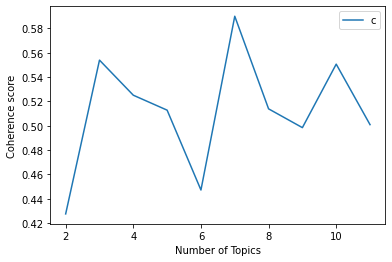

In [73]:
start,stop,step=2,12,1
clean_text=preprocess_data(reviewTitle)
graph(clean_text,start,stop,step)

In [75]:
number_of_topics=2
words=10
#document_list,titles=load_data("","articles.txt")
clean_text=preprocess_data(reviewTitle)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.525*"ten" + 0.458*"ring" + 0.406*"chi" + 0.406*"legend" + 0.406*"shang" + 0.059*"year" + 0.059*"late" + 0.059*"preciou" + 0.059*"time" + 0.052*"8"'), (1, '0.333*"anoth" + 0.333*"flick" + 0.333*"superb" + 0.333*"stand" + 0.333*"mceu" + 0.333*"kitti" + 0.333*"alon" + 0.333*"yet" + 0.333*"superhero" + -0.000*"stori"')]


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
The words in both the models are same but there are less measurements in LSA while compaired with LDA.LSA is quicker than LDA.
The Natural Language Programming have been deal by the both LSA (Latent SEmantic Analysis) and LDA (Latent Dirichlet Allocation).
In matrix format there are some bag of words, which acts as input for both LSA and LDA.LDA focuses on topic modeling problems while LSA focuses on reducing matrix dimension.
In LSA, if the words have similar meaning then the words will occur in same type of text.
LDA is a unsupervised learning and has a typical example called topic model and each topic mix wit various model and each model mix with various words.
The categories in this have the same probability in between the words contains in documents.
Both LDA and LSA uses bag of words as a input in matrix. Determining the number of dimension is the optimal challenge for SVD.
High dimension consume more resource while the low dimension consume less resource but they may not be differentiable.
Topic model algorithms are statstical methods that analyze the texts to dicover the themes that run through them and analyze how those themes are connected to each other.
 